**Heart disease prediction using logistic regression**
(IMP-Machine Learning class)

**Introduction**
The research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import scipy.stats as st 
import matplotlib.pyplot as plt 
import seaborn as sn  
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.linear_model import LogisticRegression
%matplotlib inline

DATA PREPARATION

The dataset from Kaggle is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes.

In [ ]:
#https://drive.google.com/file/d/1eWg_gobv0KLKMAA6bBO7lQ2zHQmKZVoj/view?usp=sharing

!gdown --id 1eWg_gobv0KLKMAA6bBO7lQ2zHQmKZVoj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eWg_gobv0KLKMAA6bBO7lQ2zHQmKZVoj
To: /content/framingham.csv
100% 196k/196k [00:00<00:00, 53.3MB/s]


In [ ]:
heart_df = pd.read_csv('framingham.csv')
heart_df.drop(['education'], axis = 1, inplace = True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Variables:
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.
- Demographic:
  - Sex: Male or Female (Nominal)
  - Age: age of the patient (Continuous)
- Behavioural:
  - currentSmoker: whether or not the patient is a current smoker (Nominal)
  - cisgPerDay: the number of cigarettes that the persion smoked on average in one day. 
- Medical(history):
  - BPMeds: whether or not the patient was on blood pressure medication (Nominal)
  - prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
  - prevalentHyp: whether or not the patient was hypertensive (Nominal)
  - diabetes: whether or not the patient had diabetes (Nominal)
- Medical(current):
  - totChol: total cholesterol level (Continuous)
  - sysBP: systolic blood pressure (Continuous)
  - diaBP: diastolic blood pressure (Continuous)
  - BMI: Body Mass Index (Continuous)
  - heartRate: heart rate (Continuous)
  - glucose: glucose level (Continuous)
- Predict variable (desired target):
  - 10 year risk of coronary heart disease CHD (binary: 1 - Yes, 0 - No)


In [ ]:
#Missing values
heart_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count = 0
for i in heart_df.isnull().sum(axis=1):
  if i>0:
    count = count + 1
print('Number rows with missing value: ', count)
print('Percent of the entire dataset of the rows with missing values are excluded: ', round((count/len(heart_df.index))*100),'%')
  

Number rows with missing value:  489
Percent of the entire dataset of the rows with missing values are excluded:  12 %


In [ ]:
heart_df.dropna(axis = 0, inplace = True)

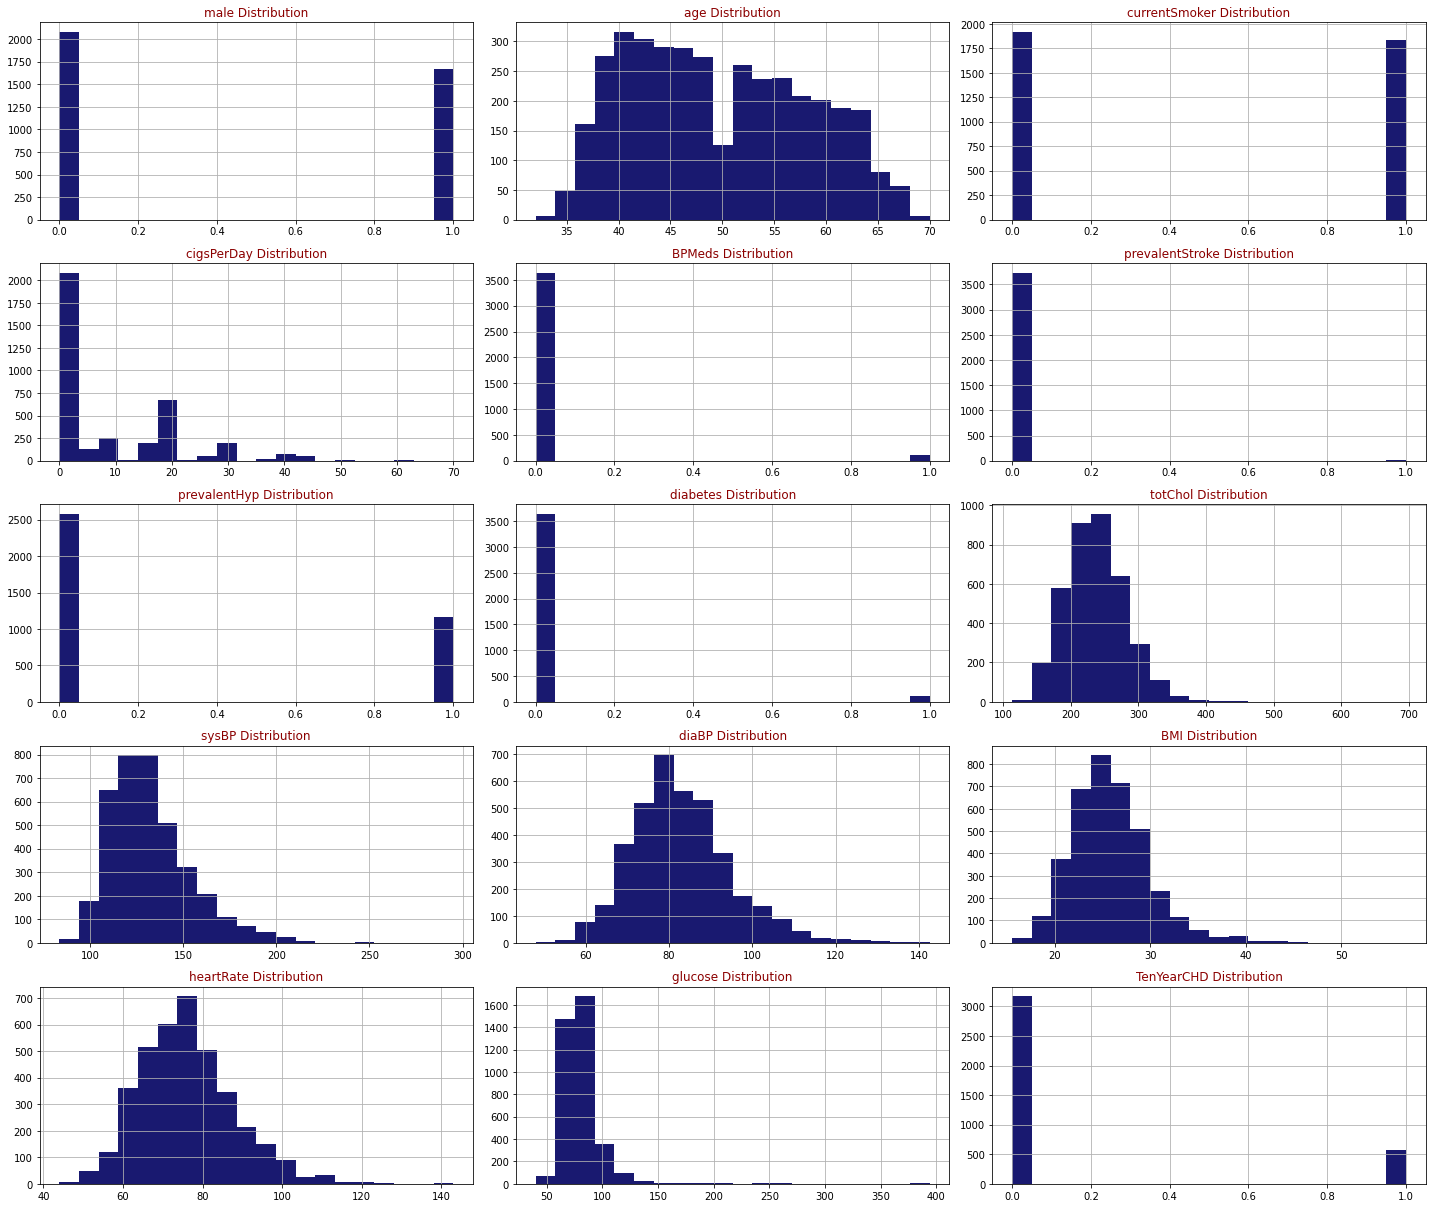

In [ ]:
#EXPLORATORY ANALYSIS
def draw_historgrams(dataframe, features, rows, cols):
  fig = plt.figure(figsize = (20,20))
  for i, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, i+1)
    dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
    ax.set_title(feature + " Distribution", color = 'DarkRed')
  
  fig.tight_layout()
  plt.show()

draw_historgrams(heart_df, heart_df.columns, 6, 3)

In [ ]:
heart_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

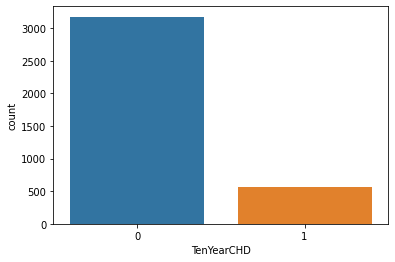

In [ ]:
sn.countplot(x = 'TenYearCHD', data = heart_df)

So, there are 3177 patents with no heart disease and 572 patients with risk of heart disease

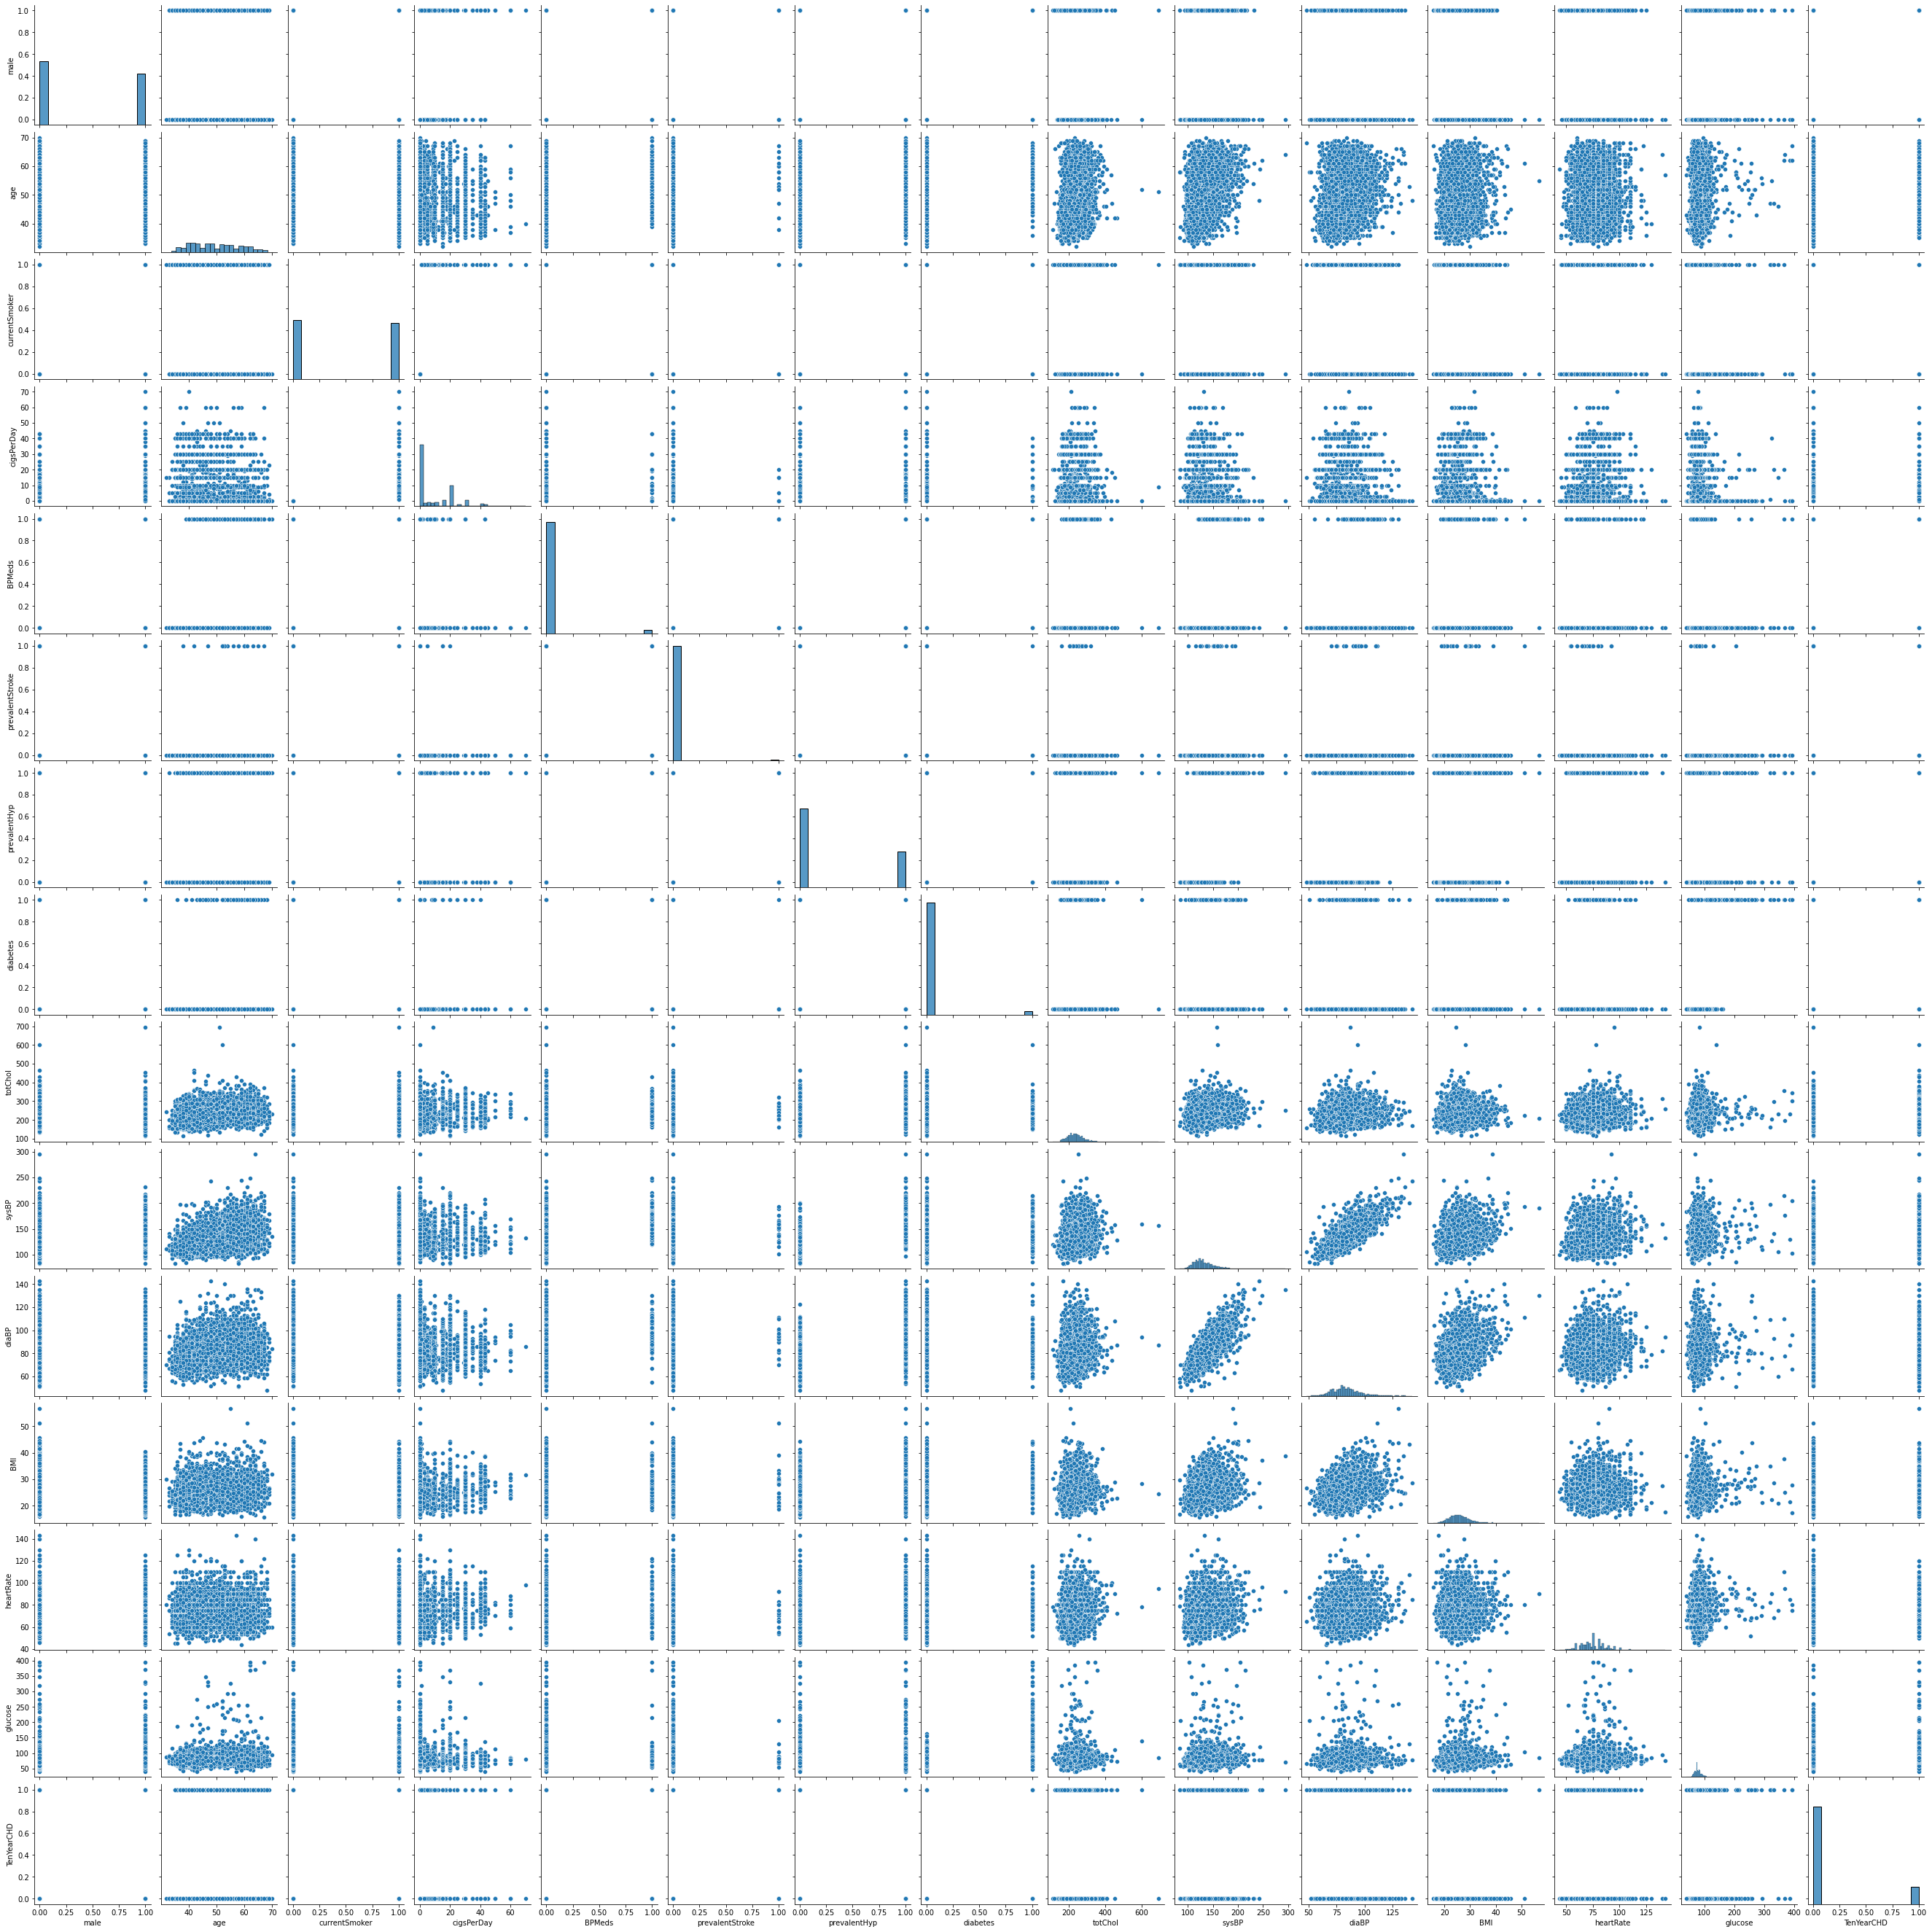

In [ ]:
sn.pairplot(data = heart_df)

In [ ]:
heart_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Logistic Regression**

In [ ]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df) 
heart_df_constant.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.1169
Time:                        22:26:17   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
male                0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha (5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time followed by running the regression repeadtely until all attributes have P values less than 0.05

Feature Selection: Backward elemination (P-value approach)

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
  while len(col_list) >0:
    model = sm.Logit(dep_var, data_frame[col_list])
    result = model.fit(disp = 0)
    largest_pvalue = round(result.pvalues,3).nlargest(1)
    if largest_pvalue[0] < (0.05):
      return result 
      break
    else:
      col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(heart_df_constant, heart_df.TenYearCHD, cols) 

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.1148
Time:                        22:26:18   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
male           0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

Logistic Regression equation

P=eβ0+β1X1/1+eβ0+β1X1

When all features plugged in:

logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

In [ ]:
#INTERPRETING THE RESULTS: ODDS RATIO, CONFIDENCE INTERVALS AND PVALUES
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio', 'pvalue'] 
print((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000044       0.000274    0.000109   0.000
male            1.454877       2.198166    1.788313   0.000
age             1.054409       1.080897    1.067571   0.000
cigsPerDay      1.011730       1.028128    1.019896   0.000
totChol         1.000150       1.004386    1.002266   0.036
sysBP           1.013299       1.021791    1.017536   0.000
glucose         1.004343       1.010895    1.007614   0.000


- This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease of males over that of females is exp(0.5813) = 1.788313. We can say that the odds for males are 78.8% higher than the odds for females.
- The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0654) = 1.067644
- Similarly, with every extra cigarette one smokes there is a 2% increase in the odds of CDH.
- For Total cholosterol level and glucose there is no significant change
- There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure

In [ ]:
#SPLITTING DATA TO TRAIN AND TEST SPLIT
import sklearn
new_features = heart_df[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose', 'TenYearCHD']]
x = new_features.iloc[:, :-1]
y = new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 5)


In [ ]:
print("X Train:", x_train.shape)
print("X Test:", x_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (2999, 6)
X Test: (750, 6)
Y Train: (2999,)
Y Test: (750,)


In [ ]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [ ]:
#MODEL EVALUATION
#Model accuracy
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8706666666666667

In [ ]:
#Accuracy of the model is 0.88

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       647
           1       0.80      0.08      0.14       103

    accuracy                           0.87       750
   macro avg       0.84      0.54      0.54       750
weighted avg       0.86      0.87      0.82       750



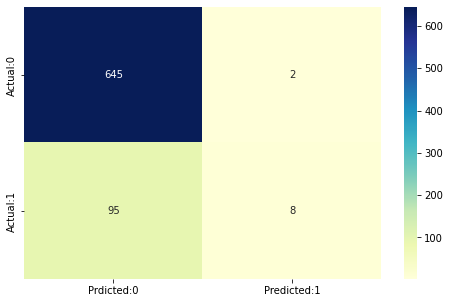

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Prdicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot = True, fmt= 'd', cmap= 'YlGnBu')

The confusion matrix shows 645+8 = 653 correct predictions and 97 incorrect ones
- True positives:4
- True negatives = 658
- False positives: 1
- False negatives: 88

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [ ]:
#MODEL EVALUATION - STATISTICS
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8706666666666667 
 The Missclassification = 1-Accuracy =  0.1293333333333333 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.07766990291262135 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9969088098918083 
 Positive Predictive value = TP/(TP+FP) =  0.8 
 Negative predictive Value = TN/(TN+FN) =  0.8716216216216216 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  25.126213592232638 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.925190035372921


From the above, it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives


Predicted probabilities of 0 (No Coronary Heart Disease) and 1 (Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

In [ ]:
y_pred_prob = logreg.predict_proba(x_test)[:,:]
y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['Prob of no heart disease (0)', 'Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.776007,0.223993
1,0.545839,0.454161
2,0.831885,0.168115
3,0.887943,0.112057
4,0.920593,0.079407


In [ ]:
#LOWER THE THRESHOLD
#Since the model is predicting Heart disease too many type II errors is not advisable. 
#A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. 
#Hence inorder to increase the sensitivity, threshold can be lowered.


In [ ]:
 from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,threshold = i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[311 336]
 [  8  95]] 
 with 406 correct predictions and 8 Type II errors( False Negatives) 

 Sensitivity:  0.9223300970873787 Specificity:  0.4806800618238022 



With 0.2 threshold the Confusion Matrix is  
 [[516 131]
 [ 46  57]] 
 with 573 correct predictions and 46 Type II errors( False Negatives) 

 Sensitivity:  0.5533980582524272 Specificity:  0.7975270479134466 



With 0.3 threshold the Confusion Matrix is  
 [[595  52]
 [ 68  35]] 
 with 630 correct predictions and 68 Type II errors( False Negatives) 

 Sensitivity:  0.33980582524271846 Specificity:  0.919629057187017 



With 0.4 threshold the Confusion Matrix is  
 [[638   9]
 [ 88  15]] 
 with 653 correct predictions and 88 Type II errors( False Negatives) 

 Sensitivity:  0.14563106796116504 Specificity:  0.9860896445131375 





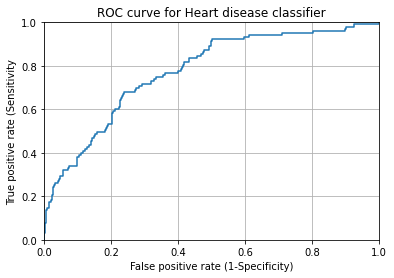

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve 
fpr, tpr, threholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity')
plt.grid(True)


A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

In [ ]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.5372893564022148

**Area Under the curve (AUC)**

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.



In [ ]:
sklearn.metrics.roc_auc_score(y_test, y_pred_prob_yes[:,1])

0.7733677465824343

**Conclusions:**
- All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.

- Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.

- Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)

- The model predicted with 0.88 accuracy. The model is more specific than sensitive.

- The Area under the ROC curve is 77.3 which is somewhat satisfactory.

- Overall model could be improved with more data.